<a href="https://colab.research.google.com/github/Ayon150/AI/blob/main/Augmentation_with_CIFAR_10(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Using device: cuda
✅ Model initialized.
Epoch [1/20] | Train Acc: 40.67% | Test Acc: 52.47% | Loss: 1.6024
Epoch [2/20] | Train Acc: 53.86% | Test Acc: 63.56% | Loss: 1.2746
Epoch [3/20] | Train Acc: 58.83% | Test Acc: 66.67% | Loss: 1.1586
Epoch [4/20] | Train Acc: 62.62% | Test Acc: 69.21% | Loss: 1.0671
Epoch [5/20] | Train Acc: 65.24% | Test Acc: 70.31% | Loss: 1.0005
Epoch [6/20] | Train Acc: 66.77% | Test Acc: 73.77% | Loss: 0.9582
Epoch [7/20] | Train Acc: 68.81% | Test Acc: 73.51% | Loss: 0.9095
Epoch [8/20] | Train Acc: 70.32% | Test Acc: 75.70% | Loss: 0.8719
Epoch [9/20] | Train Acc: 71.17% | Test Acc: 73.66% | Loss: 0.8440
Epoch [10/20] | Train Acc: 72.23% | Test Acc: 77.57% | Loss: 0.8138
Epoch [11/20] | Train Acc: 73.17% | Test Acc: 78.61% | Loss: 0.7908
Epoch [12/20] | Train Acc: 74.06% | Test Acc: 78.87% | Loss: 0.7712
Epoch [13/20] | Train Acc: 74.76% | Test Acc: 78.74% | Loss: 0.7482
Epoch [14/20] | Train Acc: 74.85% | Test Acc: 79.62% | Loss: 0.7407
Epoch [15/20] |

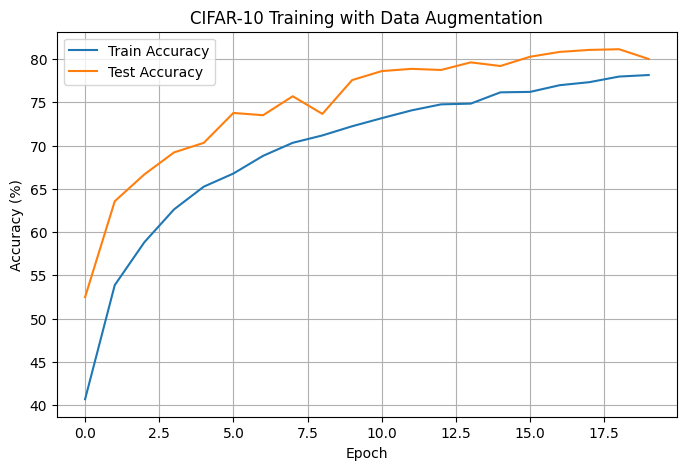


🧩 Predicted vs True Labels:
 1. Predicted: cat        | True: cat       
 2. Predicted: ship       | True: ship      
 3. Predicted: ship       | True: ship      
 4. Predicted: ship       | True: airplane  
 5. Predicted: frog       | True: frog      
 6. Predicted: frog       | True: frog      
 7. Predicted: automobile | True: automobile
 8. Predicted: frog       | True: frog      
 9. Predicted: cat        | True: cat       
10. Predicted: automobile | True: automobile
11. Predicted: airplane   | True: airplane  
12. Predicted: truck      | True: truck     
13. Predicted: dog        | True: dog       
14. Predicted: horse      | True: horse     
15. Predicted: truck      | True: truck     
16. Predicted: ship       | True: ship      
17. Predicted: dog        | True: dog       
18. Predicted: horse      | True: horse     
19. Predicted: ship       | True: ship      
20. Predicted: frog       | True: frog      
21. Predicted: horse      | True: horse     
22. Predicted: airplane   

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


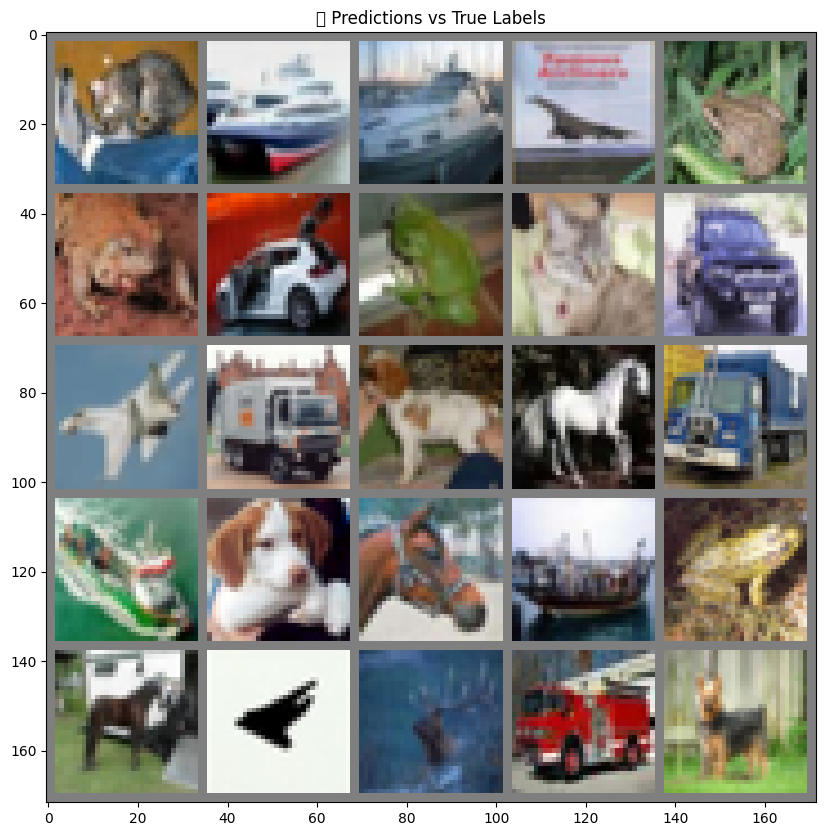

✅ Model saved as 'cifar10_augmented_cnn.pth'


In [4]:
# ===============================================
# 🧩 CIFAR-10 Training with Data Augmentation
# ===============================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------------
# 1️⃣ Device Configuration
# --------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# --------------------------------------------------
# 2️⃣ Data Augmentation & Normalization
# --------------------------------------------------
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

# --------------------------------------------------
# 3️⃣ Load CIFAR-10 Dataset
# --------------------------------------------------
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=100, shuffle=False, num_workers=2)

# --------------------------------------------------
# 4️⃣ Define CNN Model
# --------------------------------------------------
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 2 * 2, 256),  # ✅ Corrected input size
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x



model = SimpleCNN().to(device)
print("✅ Model initialized.")

# --------------------------------------------------
# 5️⃣ Loss Function and Optimizer
# --------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --------------------------------------------------
# 6️⃣ Training the Model
# --------------------------------------------------
num_epochs = 20
train_acc_list, test_acc_list = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_acc_list.append(train_acc)

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_acc = 100 * correct / total
    test_acc_list.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}% | Loss: {running_loss/len(train_loader):.4f}")

# --------------------------------------------------
# 7️⃣ Final and Average Accuracy
# --------------------------------------------------
final_accuracy = test_acc_list[-1]
average_accuracy = np.mean(test_acc_list)

print("\n🎯 Final Test Accuracy: {:.2f}%".format(final_accuracy))
print("📊 Average Test Accuracy: {:.2f}%".format(average_accuracy))

# --------------------------------------------------
# 8️⃣ Plot Accuracy Graph
# --------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.title('CIFAR-10 Training with Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------------
# 9️⃣ Show 5×5 Grid of Test Images with Predictions
# --------------------------------------------------
classes = train_dataset.classes

def imshow(img):
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Predict
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display
plt.figure(figsize=(10,10))
images = images.cpu()
imshow(torchvision.utils.make_grid(images[:25], nrow=5))
plt.title("🔍 Predictions vs True Labels")

# Print label pairs below each row
print("\n🧩 Predicted vs True Labels:")
for i in range(25):
    print(f"{i+1:2d}. Predicted: {classes[predicted[i]]:10s} | True: {classes[labels[i]]:10s}")

plt.show()

# --------------------------------------------------
# 🔟 Save Model
# --------------------------------------------------
torch.save(model.state_dict(), "cifar10_augmented_cnn.pth")
print("✅ Model saved as 'cifar10_augmented_cnn.pth'")